# 3.1 - Data Cleaning


![cleaning](images/cleaning.jpg)


$$$$

Una vez que hemos conseguido los datos necesarios, es necesario observar su calidad y orden. No se trata de un análisis exploratorio de los datos, sino de ver como de sucios y desordenados están nuestros datos. Cuando los datos tienen problemas de calidad decimos que los datos están sucios. Los problemas de calidad están relacionados con valores nulos, datos inconsistentes, tipo de dato incorrecto y registros duplicados. 


$$$$
![assess](images/data_assess.png)
$$$$
$$$$

Por otro lado, el orden de los datos está relacionado con su estructura. Como dice [Hadley Wickham](http://hadley.nz/) en su paper [Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), los datos están ordenados cuando:

+ Cada variable forma una columna.
+ Cada observación forma una fila.
+ Cada tipo de unidad observacional forma una tabla.
$$$$
![clean](images/data_clean.png)




# Ejemplo...

### Importaciones y carga de datos.

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)  # me muestre todas las columnas
#pd.set_option('display.max_rows', None)  # me muestre todas las filas

In [2]:
df = pd.read_csv('../data/vehicles_messy.csv')

df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,(FFS),-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,(GUZZLER),-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-8500,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,(FFS),-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,500,NaN,SIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,NaN,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-8500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,"(FFS,TRBO)",-1,2150,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4000,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


### Exploración

In [3]:
dim_original = df.shape

df.shape

(37843, 83)

In [4]:
df.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [6]:
df.make.value_counts()

Chevrolet                      3795
Ford                           3102
Dodge                          2513
GMC                            2389
Toyota                         1919
                               ... 
ASC Incorporated                  1
Volga Associated Automobile       1
Panoz Auto-Development            1
Panos                             1
Mahindra                          1
Name: make, Length: 133, dtype: int64

In [7]:
df.dtypes

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [8]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

In [9]:
# columnas con valores nulos

nan_cols = df.isna().sum()

nan_cols[nan_cols>0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [11]:
nan_cols[nan_cols>1e4].index

Index(['eng_dscr', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType',
       'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr',
       'startStop'],
      dtype='object')

### Borrado de columnas con más de 10.000 valores nulos

In [12]:
# df = df.drop(columns = nan_cols[nan_cols>1e4].index)

df.drop(columns = nan_cols[nan_cols>1e4].index, inplace=True)

In [13]:
nan_cols = df.isna().sum()

nan_cols[nan_cols>0]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

In [14]:
dim_original, df.shape

((37843, 83), (37843, 70))

### Exploración columnas `cylinders` y `displ`

In [15]:
# indices donde cylinders es nulo


bad_index = df.cylinders[df.cylinders.isna()].index

bad_index[:10]

Int64Index([7138, 7139, 8143, 8144, 8146, 8147, 9212, 9213, 10329, 21413], dtype='int64')

In [18]:
len(bad_index)

123

In [19]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].fuelType.unique()

array(['Electricity', 'Regular'], dtype=object)

**Espera, son eléctricos, de hecho existe un Mazda con motor rotatorio. Efectivamente no tienen cilindros ni cilindrada**

In [21]:
# rellena con cero los valores nulos en esas 2 columnas

df[['cylinders', 'displ']] = df[['cylinders', 'displ']].fillna(0)

In [23]:
nan_cols = df.isna().sum()

nan_cols[nan_cols>0]

drive    1189
trany      11
dtype: int64

### Exploración columna `drive`

In [24]:
# indices donde drive es nulo

bad_index = df.drive[df.drive.isna()].index

bad_index[:10]

Int64Index([7138, 8144, 8147, 18217, 18218, 18219, 18220, 18221, 18222, 18223], dtype='int64')

In [27]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'drive']].fuelType.unique()

array(['Electricity', 'Regular', 'Diesel', 'Premium'], dtype=object)

In [28]:
df.drive.unique()

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive',
       '2-Wheel Drive, Front'], dtype=object)

In [29]:
df.iloc[bad_index].model.unique()

array(['Altra EV', 'Th!nk', 'Hyper-Mini', 'Spider Veloce 2000', 'X1/9',
       'Corvette', '300ZX', 'EXP', 'Civic CRX', 'Kenyon 5.0 Cabrio',
       'Countach Lp500s', 'Esprit', 'RX-7', '380SL', 'Spider', 'Fiero',
       'GT V6 2.5', 'Avanti II', 'Biturbo', '911 SC', '928 S', '944',
       'Starlet', 'Rabbit Convertible', 'Lagonda',
       'Saloon/vantage/volante', 'Coupe GT', 'Quattro', '4000',
       '4000 S quattro', '3 Series', '6 Series', 'Camaro',
       'Cavalier Convertible', 'Chevette', 'Laser/Daytona',
       'LeBaron Convertible', 'Maxima', 'Pulsar/Pulsar-NX', 'Sentra',
       '200SX', '300ZX 2x2', 'Charger', 'Colt', 'Conquest', 'Daytona',
       '600 Convertible', 'Laser', 'Mustang', 'Accord', 'Civic',
       'Prelude', 'I-Mark', 'Impulse', 'XJS', 'XJ', 'Capri', 'GLC',
       '190 D 2.2/190 E 2.3', 'Cordia', 'Precis', 'Starion', 'Tredia',
       'Turismo', 'Firebird', '1000', '2000 Sunbird Convertible', 'Fuego',
       '18i', 'Corniche', 'Sedan', 'Celica', 'Celica Supra',
  

**Este es el punto donde siempre hay que decidir. ¿Qué nos conviene más, borrar registros o rellenar con un `unknown`? ¿o usar chatGPT?**

In [30]:
df.drive.fillna('unknown', inplace=True)

In [31]:
nan_cols = df.isna().sum()

nan_cols[nan_cols>0]

trany    11
dtype: int64

In [32]:
df[df.drive=='unknown'].head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
7138,0.240000,0.0,0.0,0.0,81,0.0,0,0.0,0.0,41.0,0.0,0,-1,0.0,0.000000,85,0.0,0,0.0,40.0,0.0,0.0,0.0,0.0,unknown,0,-1,800,0,Electricity,Electricity,-1,-1,91,0.0,0,0.0,0.0,37.0,0.0,0,0,16423,0,0,Nissan,Altra EV,N,False,0,0,90,0.0,0.0,0.0,0.0,NaN,116.2069,0.0,129.6154,0.0,Midsize Station Wagons,2000,2750,0.0,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,0,0,0
8144,0.312000,0.0,0.0,0.0,74,0.0,0,0.0,0.0,46.0,0.0,0,-1,0.0,0.000000,65,0.0,0,0.0,52.0,0.0,0.0,0.0,0.0,unknown,0,-1,1000,0,Electricity,Electricity,-1,-1,58,0.0,0,0.0,0.0,59.0,0.0,0,0,17329,0,0,Ford,Th!nk,N,False,0,0,29,0.0,0.0,0.0,0.0,NaN,105.3125,0.0,82.1951,0.0,Two Seaters,2001,1750,0.0,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,0,0,0
8147,0.270000,0.0,0.0,0.0,84,0.0,0,0.0,0.0,40.0,0.0,0,-1,0.0,0.000000,75,0.0,0,0.0,45.0,0.0,0.0,0.0,0.0,unknown,0,-1,900,0,Electricity,Electricity,-1,-1,66,0.0,0,0.0,0.0,51.0,0.0,0,0,17331,0,0,Nissan,Hyper-Mini,N,False,0,0,33,0.0,0.0,0.0,0.0,NaN,120.3571,0.0,93.6111,0.0,Two Seaters,2001,2250,0.0,Tue Jan 01 00:00:00 EST 2013,Thu Jul 07 00:00:00 EDT 2016,0,0,0
18217,15.695714,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,unknown,9002,-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,26561,0,0,Alfa Romeo,Spider Veloce 2000,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.0000,0.0,35.0000,0.0,Two Seaters,1984,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
18218,14.982273,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,403.954545,22,0.0,0,0.0,0.0,0.0,0.0,4.0,1.5,unknown,12710,-1,1500,0,Regular,Regular Gasoline,-1,-1,26,0.0,0,0.0,0.0,0.0,0.0,0,0,26562,0,0,Bertone,X1/9,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,25.0000,0.0,36.0000,0.0,Two Seaters,1984,-750,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


### Exploración columna `trany`

In [34]:
df.trany.head()

0       Manual 5-spd
1       Manual 5-spd
2       Manual 5-spd
3    Automatic 3-spd
4       Manual 5-spd
Name: trany, dtype: object

In [37]:
df.trany[df.trany.isna()]

7138     NaN
7139     NaN
8143     NaN
8144     NaN
8146     NaN
8147     NaN
9212     NaN
9213     NaN
10329    NaN
19097    NaN
19128    NaN
Name: trany, dtype: object

In [38]:
df.trany.fillna('unknown', inplace=True)

In [41]:
nan_cols = df.isna().sum()

nan_cols[nan_cols>0]

Series([], dtype: int64)

**Hasta aquí la limpieza de nulos.**

### Eliminación de duplicados

In [46]:
df.duplicated().any()  # any = ¿hay alguno True?

False

In [47]:
df.drop_duplicates().shape == df.shape    # NO hay duplicados

True

In [49]:
df[df.duplicated()]

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb


In [50]:
# ambas lineas dicen los mismo, elimina filas duplicadas

df = df.drop_duplicates()

df.drop_duplicates(inplace=True)

In [51]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,make,model,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,VClass,year,youSaveSpend,charge240b,createdOn,modifiedOn,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,423.190476,21,0.0,0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,9011,-1,1600,0,Regular,Regular Gasoline,-1,-1,25,0.0,0,0.0,0.0,0.0,0.0,0,0,1,0,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,23.3333,0.0,35.0000,0.0,Two Seaters,1985,-1250,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,12.0,4.9,Rear-Wheel Drive,22020,-1,3050,0,Regular,Regular Gasoline,-1,-1,14,0.0,0,0.0,0.0,0.0,0.0,0,0,10,0,0,Ferrari,Testarossa,N,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,11.0000,0.0,19.0000,0.0,Two Seaters,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,329.148148,27,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,Front-Wheel Drive,2100,-1,1250,0,Regular,Regular Gasoline,-1,-1,33,0.0,0,0.0,0.0,0.0,0.0,19,77,100,0,0,Dodge,Charger,Y,False,0,0,0,0.0,0.0,0.0,0.0,Manual 5-spd,29.0000,0.0,47.0000,0.0,Subcompact Cars,1985,500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,807.909091,11,0.0,0,0.0,0.0,0.0,0.0,8.0,5.2,Rear-Wheel Drive,2850,-1,3050,0,Regular,Regular Gasoline,-1,-1,12,0.0,0,0.0,0.0,0.0,0.0,0,0,1000,0,0,Dodge,B150/B250 Wagon 2WD,N,False,0,0,0,0.0,0.0,0.0,0.0,Automatic 3-spd,12.2222,0.0,16.6667,0.0,Vans,1985,-8500,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,0.0,-1,-1,0.0,467.736842,19,0.0,0,0.0,0.0,0.0,0.0,4.0,2.2,4-Wheel or All-Wheel Drive,66031,-1,2150,0,Premium,Premium Gasoline,-1,-1,23,0.0,0,0.0,0.0,0.0,0.0,0,0,10000,0,14,Subaru,Legacy AWD Turbo,N,False,0,90,0,0.0,0.0,0.0,0.0,Manual 5-spd,21.0000,0.0,32.0000,0.0,Compact Cars,1993,-4000,0.0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,0,0,0


### Columnas constantes o de baja varianza

Nos fijaremos en las columnas numéricas.

In [56]:
type(np.nan)

float

In [58]:
# columnas constantes

cte_cols = []


for c in df.select_dtypes(include=np.number):  # para cada columna numerica...
    
    if len(df[c].unique()) == 1:
        cte_cols.append(c)
        
cte_cols

['charge120']

In [60]:
df['charge120'].unique()

array([0.])

In [61]:
df.drop(columns = ['charge120'], inplace=True)

In [62]:
# columnas constantes

cte_cols = []


for c in df.select_dtypes(include=np.number):  # para cada columna numerica...
    
    if df[c].std() == 0:
        cte_cols.append(c)
        
cte_cols

[]

In [63]:
# columnas ctes

cte_str_cols = []

for c in df.select_dtypes(include='object'):   # para cada columna NO numerica...
    
    if len(df[c].unique())==1:
        cte_str_cols.append(c)
        
        
cte_str_cols

[]

In [64]:
df.shape

(37843, 69)

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143
barrelsA08,37843.0,0.216169,1.141527,0.00,0.00000,0.000000,0.000000,18.311667
charge240,37843.0,0.023531,0.427647,0.00,0.00000,0.000000,0.000000,12.000000
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000
cityA08,37843.0,0.520149,3.837874,0.00,0.00000,0.000000,0.000000,127.000000
cityA08U,37843.0,0.327163,3.542596,0.00,0.00000,0.000000,0.000000,127.093000
cityCD,37843.0,0.000406,0.039918,0.00,0.00000,0.000000,0.000000,5.350000
cityE,37843.0,0.184790,2.904558,0.00,0.00000,0.000000,0.000000,122.000000
cityUF,37843.0,0.000706,0.019458,0.00,0.00000,0.000000,0.000000,0.849000


In [66]:
# cols baja var

low_var = []

for c in df.select_dtypes(include=np.number):  # para cada columna numerica...
    
    minimo = df[c].min()
    maximo = df[c].max()
    
    per_90 = np.percentile(df[c], 90)
    per_10 = np.percentile(df[c], 10)
    
    
    if minimo==per_90 or maximo==per_10:
        low_var.append(c)
        
low_var

['barrelsA08',
 'charge240',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2A',
 'co2TailpipeAGpm',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'fuelCostA08',
 'ghgScoreA',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'UCityA',
 'UHighwayA',
 'charge240b',
 'phevCity',
 'phevHwy',
 'phevComb']

In [67]:
df.drop(columns = low_var, inplace=True)

In [68]:
dim_original, df.shape

((37843, 83), (37843, 37))

### Outliers (datos atípicos)

Outlier se refiere a esos registros con valores extremos, fuera del rango intercuartil. Dichos valores podrían ser datos verdaderos o fallos de registro. Sea como fuere, se suelen eliminar estos registros porque podrían desplazar la media de una manera ficticia. Esto es, la robustez de los datos. Los datos atípicos 'pesan más' que los datos cercanos a la media. Un solo valor es suficiente para influenciar enormemente la media del conjunto de datos. Esta vez nos fijaremos en los datos por filas.

In [70]:
stats = df.describe().T

stats['IQR'] = stats['75%'] - stats['25%']

stats

,count,mean,std,min,25%,50%,75%,max,IQR
barrels08,37843.0,17.532506,4.575950,0.06,14.33087,17.347895,20.600625,47.087143,6.269755
city08,37843.0,17.941389,6.660360,6.00,15.00000,17.000000,20.000000,138.000000,5.000000
city08U,37843.0,4.042737,9.645820,0.00,0.00000,0.000000,0.000000,138.304000,0.000000
co2,37843.0,61.503713,153.387715,-1.00,-1.00000,-1.000000,-1.000000,847.000000,0.000000
co2TailpipeGpm,37843.0,473.179736,122.188847,0.00,388.00000,467.736842,555.437500,1269.571429,167.437500
comb08,37843.0,20.195809,6.623444,7.00,17.00000,19.000000,23.000000,124.000000,6.000000
comb08U,37843.0,4.549751,10.389994,0.00,0.00000,0.000000,0.000000,124.360100,0.000000
cylinders,37843.0,5.719340,1.779180,0.00,4.00000,6.000000,6.000000,16.000000,2.000000
displ,37843.0,3.307658,1.371982,0.00,2.20000,3.000000,4.300000,8.400000,2.100000
engId,37843.0,8860.308961,17829.683477,0.00,0.00000,211.000000,4505.000000,69102.000000,4505.000000


In [ ]:
%pip install matplotlib

In [71]:
%matplotlib inline

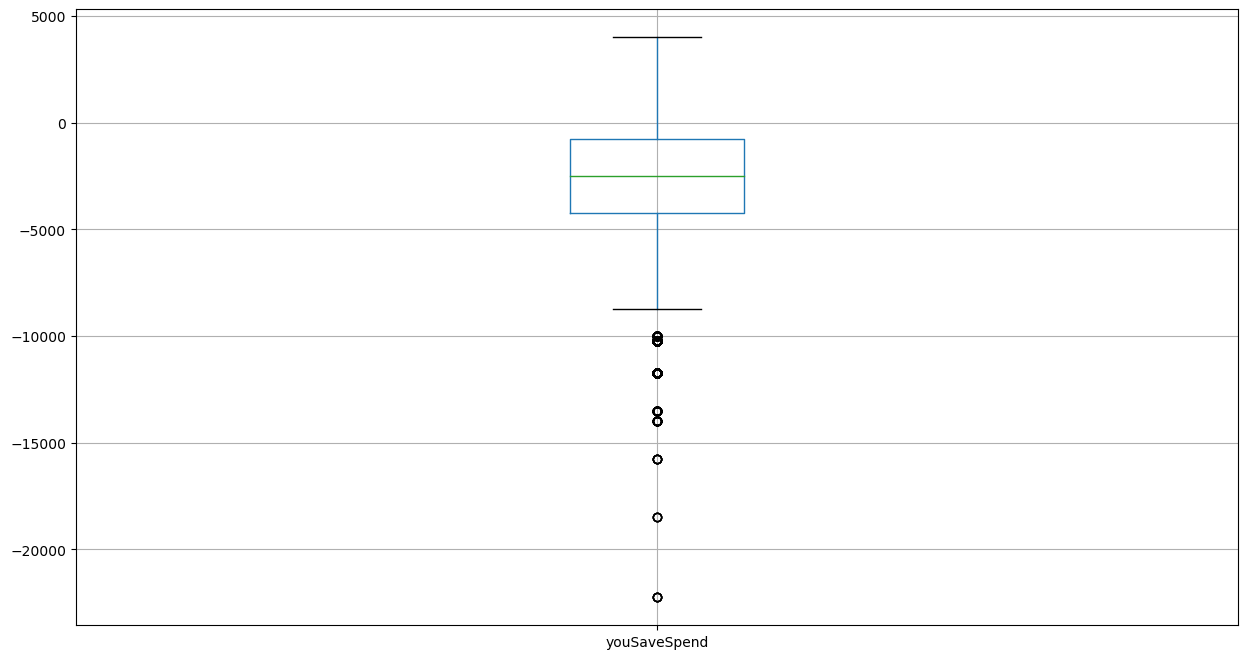

In [73]:
df[['youSaveSpend']].boxplot(figsize=(15, 8));

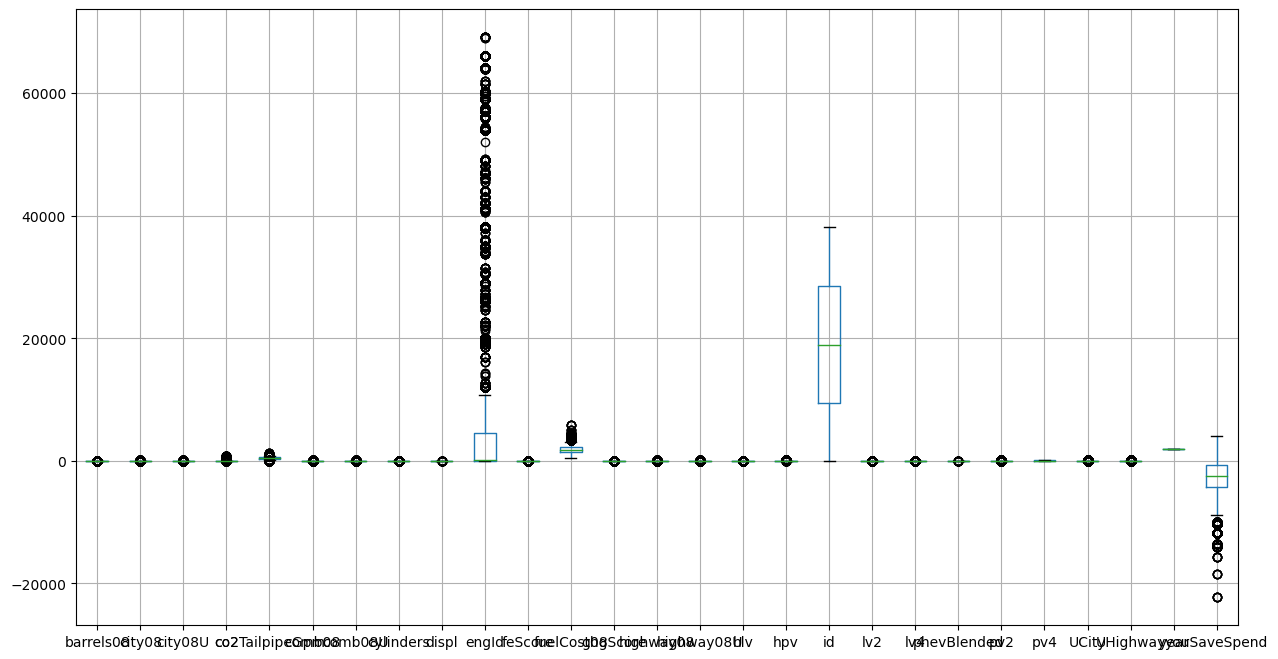

In [75]:
df.boxplot(figsize=(15, 8));

### Colinealidad  

Columnas con la misma información.

In [76]:
df.corr()

,barrels08,city08,city08U,co2,co2TailpipeGpm,comb08,comb08U,cylinders,displ,engId,feScore,fuelCost08,ghgScore,highway08,highway08U,hlv,hpv,id,lv2,lv4,phevBlended,pv2,pv4,UCity,UHighway,year,youSaveSpend
barrels08,1.000000,-0.754178,-0.360597,-0.113773,0.987493,-0.813910,-0.356207,0.747222,0.792071,-0.073507,-0.325141,0.915986,-0.325686,-0.858107,-0.344219,-0.255115,-0.293999,-0.192848,-0.123986,-0.258650,-0.073758,-0.124002,-0.311614,-0.732513,-0.858946,-0.204844,-0.916718
city08,-0.754178,1.000000,0.572131,0.057167,-0.767689,0.987464,0.526201,-0.614130,-0.613672,0.070890,0.359256,-0.696589,0.359011,0.927770,0.462646,0.245281,0.281656,0.157913,0.041028,0.141717,0.069768,0.038917,0.179480,0.996735,0.925487,0.142110,0.697109
city08U,-0.360597,0.572131,1.000000,0.625575,-0.367654,0.568988,0.995312,-0.155408,-0.152227,-0.203999,0.831998,-0.267879,0.831867,0.549666,0.976933,0.034921,0.036384,0.590515,-0.044914,0.003767,0.092432,-0.025526,0.045957,0.575844,0.548646,0.575048,0.269068
co2,-0.113773,0.057167,0.625575,1.000000,-0.117604,0.083534,0.666500,0.093307,0.072525,-0.197383,0.824190,-0.045990,0.824042,0.127048,0.709907,-0.060566,-0.062720,0.596749,-0.024676,-0.039258,0.025627,-0.003361,-0.004422,0.055694,0.130346,0.580558,0.046250
co2TailpipeGpm,0.987493,-0.767689,-0.367654,-0.117604,1.000000,-0.827964,-0.363189,0.759021,0.804397,-0.076769,-0.331295,0.929113,-0.331573,-0.872890,-0.351011,-0.259369,-0.298722,-0.194365,-0.127086,-0.262586,-0.071796,-0.127151,-0.315065,-0.746638,-0.875143,-0.205201,-0.929848
comb08,-0.813910,0.987464,0.568988,0.083534,-0.827964,1.000000,0.531857,-0.637968,-0.650974,0.052601,0.382966,-0.749350,0.382479,0.970911,0.478672,0.260312,0.298627,0.186968,0.069401,0.179940,0.060819,0.069295,0.227661,0.982058,0.968491,0.178861,0.749715
comb08U,-0.356207,0.526201,0.995312,0.666500,-0.363189,0.531857,1.000000,-0.142401,-0.143487,-0.213138,0.854487,-0.263860,0.854224,0.526566,0.992849,0.028201,0.029516,0.616354,-0.042654,0.005721,0.085616,-0.021737,0.050845,0.527940,0.525772,0.600518,0.264964
cylinders,0.747222,-0.614130,-0.155408,0.093307,0.759021,-0.637968,-0.142401,1.000000,0.904141,-0.251528,-0.124562,0.778602,-0.124417,-0.629507,-0.121194,-0.262452,-0.285848,0.064706,-0.037901,-0.151781,-0.021630,-0.028163,-0.155892,-0.595008,-0.633844,0.087389,-0.778538
displ,0.792071,-0.613672,-0.152227,0.072525,0.804397,-0.650974,-0.143487,0.904141,1.000000,-0.290353,-0.135510,0.772466,-0.135281,-0.664142,-0.127981,-0.289896,-0.319891,0.039977,-0.075315,-0.215536,-0.025600,-0.075219,-0.238131,-0.593541,-0.668717,0.047855,-0.772498
engId,-0.073507,0.070890,-0.203999,-0.197383,-0.076769,0.052601,-0.213138,-0.251528,-0.290353,1.000000,-0.197161,-0.111788,-0.197180,0.008290,-0.221752,0.199133,0.201753,-0.422106,0.018334,0.066738,-0.014956,0.011459,0.040605,0.066197,0.009610,-0.476922,0.111466


In [77]:
colineales = []


for c in df._get_numeric_data():
    
    for i in range(len(df.corr())):
        
        if abs(df.corr()[c][i])>0.9 and abs(df.corr()[c][i])<1:
            
            colineales.append(c)
            
colineales

['barrels08',
 'barrels08',
 'barrels08',
 'city08',
 'city08',
 'city08',
 'city08',
 'city08U',
 'city08U',
 'co2TailpipeGpm',
 'co2TailpipeGpm',
 'co2TailpipeGpm',
 'comb08',
 'comb08',
 'comb08',
 'comb08',
 'comb08U',
 'comb08U',
 'cylinders',
 'displ',
 'feScore',
 'fuelCost08',
 'fuelCost08',
 'fuelCost08',
 'ghgScore',
 'highway08',
 'highway08',
 'highway08',
 'highway08',
 'highway08U',
 'highway08U',
 'hlv',
 'hpv',
 'lv2',
 'pv2',
 'UCity',
 'UCity',
 'UCity',
 'UCity',
 'UHighway',
 'UHighway',
 'UHighway',
 'UHighway',
 'youSaveSpend',
 'youSaveSpend',
 'youSaveSpend']

In [78]:
colineales = list(set(colineales))

colineales

['hpv',
 'city08',
 'feScore',
 'lv2',
 'cylinders',
 'UCity',
 'pv2',
 'barrels08',
 'fuelCost08',
 'hlv',
 'highway08U',
 'comb08U',
 'youSaveSpend',
 'city08U',
 'highway08',
 'comb08',
 'ghgScore',
 'UHighway',
 'displ',
 'co2TailpipeGpm']

In [79]:
df.drop(columns=colineales, inplace=True)

In [80]:
dim_original, df.shape

((37843, 83), (37843, 17))

In [81]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37843 entries, 0 to 37842
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   co2          37843 non-null  int64 
 1   drive        37843 non-null  object
 2   engId        37843 non-null  int64 
 3   fuelType     37843 non-null  object
 4   fuelType1    37843 non-null  object
 5   id           37843 non-null  int64 
 6   lv4          37843 non-null  int64 
 7   make         37843 non-null  object
 8   model        37843 non-null  object
 9   mpgData      37843 non-null  object
 10  phevBlended  37843 non-null  bool  
 11  pv4          37843 non-null  int64 
 12  trany        37843 non-null  object
 13  VClass       37843 non-null  object
 14  year         37843 non-null  int64 
 15  createdOn    37843 non-null  object
 16  modifiedOn   37843 non-null  object
dtypes: bool(1), int64(6), object(10)
memory usage: 27.9 MB


### Limpieza columna `trany`

In [82]:
df.trany.value_counts()

Automatic 4-spd                     11042
Manual 5-spd                         8311
Automatic 3-spd                      3151
Automatic (S6)                       2638
Manual 6-spd                         2429
Automatic 5-spd                      2184
Manual 4-spd                         1483
Automatic 6-spd                      1432
Automatic (S8)                        960
Automatic (S5)                        824
Automatic (variable gear ratios)      681
Automatic 7-spd                       663
Automatic (S7)                        261
Auto(AM-S7)                           256
Automatic 8-spd                       243
Automatic (S4)                        233
Auto(AM7)                             160
Auto(AV-S6)                           145
Auto(AM6)                             110
Automatic (A1)                        109
Auto(AM-S6)                            92
Automatic 9-spd                        90
Manual 3-spd                           77
Manual 7-spd                      

In [94]:
import re   # regex

int(re.findall('\d+', 'Automatic (AM6)')[0])

6

In [95]:
def limpiar_trany(x):
    
    num = re.findall('\d+', x)
    
    if num:  # si hay numero, la lista no esta vacia
        
        return int(num[0])
    
    else:
        
        return 0

In [96]:
limpiar_trany('Automatic (AM6)')

6

In [97]:
df['speed'] = df.trany.apply(limpiar_trany)

df.head()

,co2,drive,engId,fuelType,fuelType1,id,lv4,make,model,mpgData,phevBlended,pv4,trany,VClass,year,createdOn,modifiedOn,speed
0,-1,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,Manual 5-spd,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
1,-1,Rear-Wheel Drive,22020,Regular,Regular Gasoline,10,0,Ferrari,Testarossa,N,False,0,Manual 5-spd,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
2,-1,Front-Wheel Drive,2100,Regular,Regular Gasoline,100,0,Dodge,Charger,Y,False,0,Manual 5-spd,Subcompact Cars,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
3,-1,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1000,0,Dodge,B150/B250 Wagon 2WD,N,False,0,Automatic 3-spd,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,3
4,-1,4-Wheel or All-Wheel Drive,66031,Premium,Premium Gasoline,10000,14,Subaru,Legacy AWD Turbo,N,False,90,Manual 5-spd,Compact Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5


In [98]:
df.trany.value_counts()

Automatic 4-spd                     11042
Manual 5-spd                         8311
Automatic 3-spd                      3151
Automatic (S6)                       2638
Manual 6-spd                         2429
Automatic 5-spd                      2184
Manual 4-spd                         1483
Automatic 6-spd                      1432
Automatic (S8)                        960
Automatic (S5)                        824
Automatic (variable gear ratios)      681
Automatic 7-spd                       663
Automatic (S7)                        261
Auto(AM-S7)                           256
Automatic 8-spd                       243
Automatic (S4)                        233
Auto(AM7)                             160
Auto(AV-S6)                           145
Auto(AM6)                             110
Automatic (A1)                        109
Auto(AM-S6)                            92
Automatic 9-spd                        90
Manual 3-spd                           77
Manual 7-spd                      

In [99]:
def limpiar_auto(x):
    
    x = x.lower()
    
    if 'auto' in x:
        return 'automatic'
    
    elif 'man' in x:
        return 'manual'
    
    else:
        return 'unknown'

In [100]:
df.trany = df.trany.apply(limpiar_auto)

df.head()

,co2,drive,engId,fuelType,fuelType1,id,lv4,make,model,mpgData,phevBlended,pv4,trany,VClass,year,createdOn,modifiedOn,speed
0,-1,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,manual,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
1,-1,Rear-Wheel Drive,22020,Regular,Regular Gasoline,10,0,Ferrari,Testarossa,N,False,0,manual,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
2,-1,Front-Wheel Drive,2100,Regular,Regular Gasoline,100,0,Dodge,Charger,Y,False,0,manual,Subcompact Cars,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
3,-1,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1000,0,Dodge,B150/B250 Wagon 2WD,N,False,0,automatic,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,3
4,-1,4-Wheel or All-Wheel Drive,66031,Premium,Premium Gasoline,10000,14,Subaru,Legacy AWD Turbo,N,False,90,manual,Compact Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5


In [101]:
df.trany.value_counts()

automatic    25443
manual       12389
unknown         11
Name: trany, dtype: int64

In [103]:
df[df.trany=='unknown'].index

Int64Index([7138, 7139, 8143, 8144, 8146, 8147, 9212, 9213, 10329, 19097,
            19128],
           dtype='int64')

In [104]:
df.drop(index=df[df.trany=='unknown'].index, inplace=True)

In [105]:
df.trany.value_counts()

automatic    25443
manual       12389
Name: trany, dtype: int64

In [106]:
df.shape, dim_original

((37832, 18), (37843, 83))

In [107]:
df.drop_duplicates().shape==df.shape

True

## DataFrame Final

In [108]:
df.head()

,co2,drive,engId,fuelType,fuelType1,id,lv4,make,model,mpgData,phevBlended,pv4,trany,VClass,year,createdOn,modifiedOn,speed
0,-1,Rear-Wheel Drive,9011,Regular,Regular Gasoline,1,0,Alfa Romeo,Spider Veloce 2000,Y,False,0,manual,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
1,-1,Rear-Wheel Drive,22020,Regular,Regular Gasoline,10,0,Ferrari,Testarossa,N,False,0,manual,Two Seaters,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
2,-1,Front-Wheel Drive,2100,Regular,Regular Gasoline,100,0,Dodge,Charger,Y,False,0,manual,Subcompact Cars,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5
3,-1,Rear-Wheel Drive,2850,Regular,Regular Gasoline,1000,0,Dodge,B150/B250 Wagon 2WD,N,False,0,automatic,Vans,1985,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,3
4,-1,4-Wheel or All-Wheel Drive,66031,Premium,Premium Gasoline,10000,14,Subaru,Legacy AWD Turbo,N,False,90,manual,Compact Cars,1993,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,5


In [109]:
df.reset_index(drop=True, inplace=True)

In [110]:
df.to_excel('../data/vehiculos_limpio.xls', index=False)

In [ ]:
%pip install xlwt
%pip install xlrd

In [111]:
df.to_excel('../data/vehiculos_limpio.xlsx', index=False)

In [112]:
df.to_csv('../data/vehiculos_limpio.csv', index=False)

**Cuidado de no eliminarlo todo....**